# Education Attainment Prediction 2025
### Kaggle Competition

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [76]:
# Load data
census_raw = pd.read_csv("CENSUS_ED_ATTN.csv")

census_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151747 entries, 0 to 151746
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   A_MARITL   151747 non-null  int64
 1   A_SEX      151747 non-null  int64
 2   PEAFEVER   151747 non-null  int64
 3   PARENT     151747 non-null  int64
 4   PENATVTY   151747 non-null  int64
 5   PEFNTVTY   151747 non-null  int64
 6   PEHSPNON   151747 non-null  int64
 7   PEINUSYR   151747 non-null  int64
 8   PEPAR1TYP  151747 non-null  int64
 9   PRCITSHP   151747 non-null  int64
 10  PRDTRACE   151747 non-null  int64
 11  ERN_SRCE   151747 non-null  int64
 12  WSAL_VAL   151747 non-null  int64
 13  ANN_VAL    151747 non-null  int64
 14  A_HGA      151747 non-null  int64
dtypes: int64(15)
memory usage: 17.4 MB


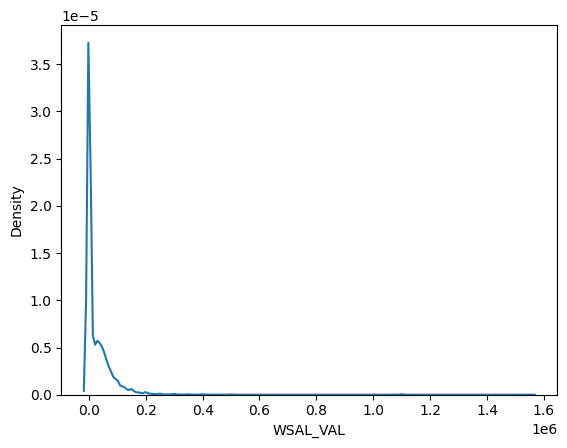

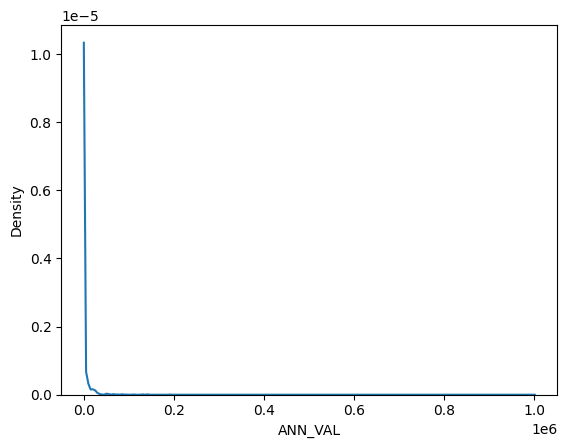

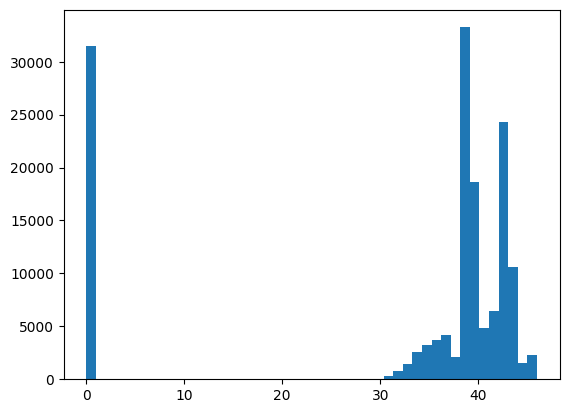

In [23]:
# Plot salary/wages
sns.kdeplot(census_raw['WSAL_VAL'])
plt.show()

# Plot other income
sns.kdeplot(census_raw['ANN_VAL'])
plt.show()

#plt.hist(census_raw['PEPAR1TYP'])
#plt.show()

# Plot target variable
plt.hist(census_raw['A_HGA'], bins=47)
plt.show()


#### Target Variable
Target Variable = `education`
0 | Child/incomplete secondary education
1 | High School Graduate
2 | Associate Degree
3 | Bachelor's Degree
4 | Master's Degree
5 | Professional/Doctorate Degree

Race dictionary
1 | White
2 | Black
3 | American Indian, Pacific Islander
4 | Asian
5 | Mixed

In [74]:
'''
# Load data
census_raw = pd.read_csv("CENSUS_ED_ATTN.csv")

# Rename Columns
census = census_raw.rename(columns = {"PEAFEVER": "military_service", 
                                  "PARENT": 'parents',
                                  "PENATVTY": "birth_country",
                                  "PEFNTVTY": "father_country",
                                  "PEHSPNON": 'hispanic',
                                  "PEINUSYR": 'us_arrival',
                                  "PEPAR1TYP": 'parent1_status',
                                  "PRCITSHP": 'citizenship',
                                  "PRDTRACE": 'race',
                                  "ERN_SRCE": 'earnings_source',
                                  "A_MARITL": "marital_status",
                                  "A_SEX": 'sex'})

# Collapse Variables
census['marital_status'] = census.marital_status.apply(lambda x: 0 if x==7 else 1 if x in [1, 2, 3] else 2)
census['military_service'] = census.military_service.apply(lambda x: x if x==1 else 2)
census['us_arrival'] = census.us_arrival.apply(lambda x: x if x==0 else 1)
census['parent1_status'] = census.parent1_status.apply(lambda x: x if x==1 else 2)
census['race'] = census.race.apply(lambda x: x if x in [1, 2, 3, 4] else 3 if x==5 else 5)
census['earnings_source'] = census.earnings_source.apply(lambda x: x if x==1 else 2)

# Make a new column for aggregated income
census['income'] = census['WSAL_VAL'] + census['ANN_VAL']
census = census.drop(columns=['WSAL_VAL', 'ANN_VAL'])

# Encode categorical variables
categorical = ['marital_status', 'sex', 'military_service', 'parents', 'birth_country', 'father_country', 'hispanic', 'us_arrival', 'parent1_status', 'citizenship', 'race', 'earnings_source']
census[categorical] = census[categorical].astype('category')

# Collapse the target variable
#no_ed = [0, 31, 32, 33, 34, 35, 36, 37, 38]
#hs = [39, 40]
#associate = [41, 42]
#bachelors = [43]
#masters = [44]
#prof = [45, 46]

#census['A_HGA'] = census.A_HGA.apply(lambda x: 0 if x in no_ed else 1 if x in hs else 2 if x in associate else 3 if x in bachelors else 4 if x in masters else 5).astype('category')
#census = census.rename(columns={"A_HGA": "education"})

census.info()

'''

'\n# Load data\ncensus_raw = pd.read_csv("CENSUS_ED_ATTN.csv")\n\n# Rename Columns\ncensus = census_raw.rename(columns = {"PEAFEVER": "military_service", \n                                  "PARENT": \'parents\',\n                                  "PENATVTY": "birth_country",\n                                  "PEFNTVTY": "father_country",\n                                  "PEHSPNON": \'hispanic\',\n                                  "PEINUSYR": \'us_arrival\',\n                                  "PEPAR1TYP": \'parent1_status\',\n                                  "PRCITSHP": \'citizenship\',\n                                  "PRDTRACE": \'race\',\n                                  "ERN_SRCE": \'earnings_source\',\n                                  "A_MARITL": "marital_status",\n                                  "A_SEX": \'sex\'})\n\n# Collapse Variables\ncensus[\'marital_status\'] = census.marital_status.apply(lambda x: 0 if x==7 else 1 if x in [1, 2, 3] else 2)\ncensus[\'military_serv

In [96]:
# Make a data processing function

def prep_census_data(df):
    # Rename Columns
    df = df.rename(columns = {"PEAFEVER": "military_service", 
                                    "PARENT": 'parents',
                                    "PENATVTY": "birth_country",
                                    "PEFNTVTY": "father_country",
                                    "PEHSPNON": 'hispanic',
                                    "PEINUSYR": 'us_arrival',
                                    "PEPAR1TYP": 'parent1_status',
                                    "PRCITSHP": 'citizenship',
                                    "PRDTRACE": 'race',
                                    "ERN_SRCE": 'earnings_source',
                                    "A_MARITL": "marital_status",
                                    "A_SEX": 'sex'})

    # Collapse Variables
    df['marital_status'] = df.marital_status.apply(lambda x: 0 if x==7 else 1 if x in [1, 2, 3] else 2)
    df['military_service'] = df.military_service.apply(lambda x: x if x==1 else 2)
    df['us_arrival'] = df.us_arrival.apply(lambda x: x if x==0 else 1)
    df['parent1_status'] = df.parent1_status.apply(lambda x: x if x==1 else 2)
    df['race'] = df.race.apply(lambda x: x if x in [1, 2, 3, 4] else 3 if x==5 else 5)
    df['earnings_source'] = df.earnings_source.apply(lambda x: x if x==1 else 2)

    # Make a new column for aggregated income
    df['income'] = df['WSAL_VAL'] + df['ANN_VAL']
    df = df.drop(columns=['WSAL_VAL', 'ANN_VAL'])

    # Encode categorical variables
    categorical = ['marital_status', 'sex', 'military_service', 'parents', 'birth_country', 'father_country', 'hispanic', 'us_arrival', 'parent1_status', 'citizenship', 'race', 'earnings_source']
    df[categorical] = df[categorical].astype('category')

    return df

In [97]:
# Pass the data through the data prep function
census = prep_census_data(census_raw)

In [100]:
# Define features and target
x = census.drop(columns='A_HGA')
y = census['A_HGA']

In [101]:
# Partition Data
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=45)

In [102]:
# Instantiate k-fold object
kf = RepeatedKFold(n_splits=5, n_repeats=4, random_state=45)

In [103]:
# Define Scoring Metrics
scorers = ['accuracy', 'precision', 'recall']

# Define hyperparameters
params = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [104]:
# Instantiate Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=45)

In [105]:
# Instantiate Grid Search on the DT
search = GridSearchCV(dt, param_grid=params, scoring=scorers, n_jobs=1, refit='accuracy', cv=kf)

In [106]:
# Employ the Grid Search
dt_model = search.fit(x_train, y_train)

/home/vscode/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/home/vscode/.local/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vscode/.local/lib/python3.12/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/home/vscode/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py", line 2247, in precision_score
    p, _, _, _ = precision_rec

In [107]:
# Identify the best model
best = dt_model.best_estimator_
print(best)

DecisionTreeClassifier(max_depth=8, random_state=45)


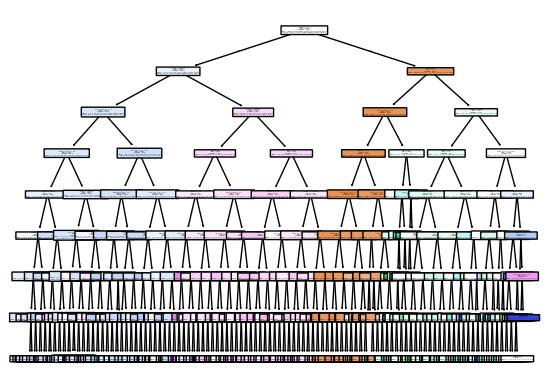

In [108]:
# Visualize the best model
plt.figure()
plot_tree(best, feature_names=x_train.columns, filled=True, rounded=True)
plt.show()

In [109]:
# Evaluate the performance metrics for the best model
best_index = dt_model.best_index_

# Extract Scores
accuracy = dt_model.cv_results_['mean_test_accuracy'][best_index]
recall = dt_model.cv_results_['mean_test_recall'][best_index]
precision = dt_model.cv_results_['mean_test_precision'][best_index]

score_df = pd.DataFrame({"Metric": ["Accuracy", "Recall", "Precision"],
                         "Score": [accuracy, recall, precision]})

print(score_df)


      Metric     Score
0   Accuracy  0.475611
1     Recall       NaN
2  Precision       NaN


In [110]:
# Determine Variable importance
var_importance = best.feature_importances_

var_importance_df = pd.DataFrame(var_importance, index=x_train.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(var_importance_df)

                  Importance
parents             0.797176
income              0.132161
birth_country       0.022307
sex                 0.013764
marital_status      0.011235
parent1_status      0.009186
father_country      0.007248
citizenship         0.002856
hispanic            0.001729
race                0.001215
military_service    0.000979
us_arrival          0.000145
earnings_source     0.000000


In [111]:
# Load test data
census_test_raw = pd.read_csv("Census_Test.csv")
census_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   A_MARITL   985 non-null    int64
 1   A_SEX      985 non-null    int64
 2   PEAFEVER   985 non-null    int64
 3   PARENT     985 non-null    int64
 4   PENATVTY   985 non-null    int64
 5   PEFNTVTY   985 non-null    int64
 6   PEHSPNON   985 non-null    int64
 7   PEINUSYR   985 non-null    int64
 8   PEPAR1TYP  985 non-null    int64
 9   PRCITSHP   985 non-null    int64
 10  PRDTRACE   985 non-null    int64
 11  ERN_SRCE   985 non-null    int64
 12  WSAL_VAL   985 non-null    int64
 13  ANN_VAL    985 non-null    int64
dtypes: int64(14)
memory usage: 107.9 KB


In [112]:
# Clean census test data
census_test = prep_census_data(census_test_raw)
census_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   marital_status    985 non-null    category
 1   sex               985 non-null    category
 2   military_service  985 non-null    category
 3   parents           985 non-null    category
 4   birth_country     985 non-null    category
 5   father_country    985 non-null    category
 6   hispanic          985 non-null    category
 7   us_arrival        985 non-null    category
 8   parent1_status    985 non-null    category
 9   citizenship       985 non-null    category
 10  race              985 non-null    category
 11  earnings_source   985 non-null    category
 12  income            985 non-null    int64   
dtypes: category(12), int64(1)
memory usage: 23.5 KB


In [113]:
# Predict on the test model
pred = dt_model.predict(census_test)

In [115]:
# Calculate Accuracy of the predicted values
#test_accuracy = accuracy_score(census_test, pred)

#print("Test Accuracy:", test_accuracy)


In [116]:
# Submission output
output = pd.DataFrame({'ID': census_test.index, 'A_HGA': pred})

print(output)

      ID  A_HGA
0      0      0
1      1     43
2      2     43
3      3     40
4      4      0
..   ...    ...
980  980     39
981  981     39
982  982      0
983  983      0
984  984      0

[985 rows x 2 columns]


In [117]:
# Save submission output as a csv file
output.to_csv('education_attainment_model1.csv', index=False)
